# Download data and prepare it for analysis.

In this project as a data analyst for an internship program in Y.Afisha's corporate analytics department to assist optimize the marketing budget budget.

The purpose of this analysis is to find out:
1. How do users use Y.Afisha products
2. When did they start making purchases
3. What is the amount of money contributed by each user
4. When all marketing costs paid off

The main stages of this data analysis include:
1. Download data and prepare it for analysis
2. Generate reports and calculate metrics
3. Writing a conclusion

## Data Pre-processing

In [1]:
# Muat semua library
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt
import seaborn as sns

## Importing Files

In [2]:
# Load the data file into a DataFrame
visits = pd.read_csv('/datasets/visits_log_us.csv')

In [3]:
orders = pd.read_csv('/datasets/orders_log_us.csv')

In [4]:
costs = pd.read_csv('/datasets/costs_us.csv')

## Studying Data contents

### Visits

This visits table contains the following columns:
- `Uid` — users ID
- `Device` — users device
- `Start Ts` — session start date and time
- `End Ts` — session expiration date and time
- `Source Id` — Advertising source ID, the source by which the user came to the website

In [5]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
visits.memory_usage('deep')

Index            128
Device       2875200
End Ts       2875200
Source Id    2875200
Start Ts     2875200
Uid          2875200
dtype: int64

In [8]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


### Orders

This orders table contains the following columns:
- `Uid` — user ID who made the order
- `Buy Ts` — the date and time the order was made
- `Revenue` — Y.Afisha's income from the order

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.memory_usage('deep')

Index         128
Buy Ts     403320
Revenue    403320
Uid        403320
dtype: int64

In [12]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


### Costs

This costs table contains the following columns:
- `source_id` — Ad source ID
- `dt` — date
- `costs` — spending on advertising sources on that date

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [14]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [15]:
costs.memory_usage('deep')

Index          128
source_id    20336
dt           20336
costs        20336
dtype: int64

In [16]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


It can be seen from the data, all of them do not have problem with missing values or in other words case of missing value not found. Hence, it can be continued to the next step.

## Check Data Type

In [17]:
visits.dtypes

Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object

In [18]:
orders.dtypes

Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object

In [19]:
costs.dtypes

source_id      int64
dt            object
costs        float64
dtype: object

After checking the data type on these three datasets, there are some data need to be corrected or changed. And also changing the spelling of the name in each column needs to be done.

## Fix All Data

### Correction of writing column names

In [20]:
#visits
visits.columns = visits.columns.str.lower()
visits.columns

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

In [21]:
visits.rename(columns = {'end ts':'end_ts', 'source id':'source_id', 'start ts':'start_ts', 'uid':'user_id'}, inplace = True)
visits

,device,end_ts,source_id,start_ts,user_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [22]:
#Orders
orders.columns = orders.columns.str.lower()
orders.columns

Index(['buy ts', 'revenue', 'uid'], dtype='object')

In [23]:
orders.rename(columns = {'buy ts':'buy_ts','uid':'user_id'}, inplace = True)
orders

,buy_ts,revenue,user_id
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [24]:
#Costs
costs.columns = costs.columns.str.lower()
costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [25]:
costs.rename(columns = {'dt':'date'}, inplace = True)
costs

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


### Correction of data type

In [26]:
#Visits
visits.dtypes

device       object
end_ts       object
source_id     int64
start_ts     object
user_id      uint64
dtype: object

In [27]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
user_id              uint64
dtype: object

In [28]:
#orders
orders.dtypes

buy_ts      object
revenue    float64
user_id     uint64
dtype: object

In [29]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
user_id            uint64
dtype: object

In [30]:
#Costs
costs.dtypes

source_id      int64
date          object
costs        float64
dtype: object

In [31]:
costs['date'] = pd.to_datetime(costs['date'])
costs.dtypes

source_id             int64
date         datetime64[ns]
costs               float64
dtype: object

All set! both data type and write errors have been fixed.

# Generate reports and calculate metrics

In compiling this report, there are three aspects (product, sales and marketing) that need to be compiled and metrics calculated.

## Products

This is a calculation of the number of people who use the product each day, week, and month.

In [32]:
#daily
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,user_id,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


In [33]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  object        
 1   end_ts         359400 non-null  datetime64[ns]
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  datetime64[ns]
 4   user_id        359400 non-null  uint64        
 5   session_year   359400 non-null  datetime64[ns]
 6   session_month  359400 non-null  datetime64[ns]
 7   session_week   359400 non-null  datetime64[ns]
 8   session_date   359400 non-null  object        
dtypes: datetime64[ns](5), int64(1), object(2), uint64(1)
memory usage: 24.7+ MB


In [34]:
#DAU (Daily Activity Users)
dau_total = visits.groupby('session_date').agg({'user_id': 'nunique'}).mean()
dau_total.round().astype('int')

user_id    908
dtype: int64

In [35]:
#weekly
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits.head()

,device,end_ts,source_id,start_ts,user_id,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,52,2017-12-27


In [36]:
#WAU (Weekly Activity Users)
wau_total = visits.groupby('session_week').agg({'user_id': 'nunique'}).mean()
wau_total.round().astype('int')

user_id    5825
dtype: int64

In [37]:
#monthly
visits['session_month'] = visits['start_ts'].dt.month
visits.head()


,device,end_ts,source_id,start_ts,user_id,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,12,52,2017-12-27


In [38]:
#MAU (Monthly Activity Users)
mau_total = visits.groupby('session_month').agg({'user_id': 'nunique'}).mean()
mau_total.round().astype('int')


user_id    23228
dtype: int64

it can be seen from the process above the following results are obtained:
1. the number of people who use the product every day is 908 people
2. the number of people who use the product every week is 5724 people
3. the number of people who use the product every month is as many as 23228 people


In [39]:
visits['session_year'] = visits['start_ts'].dt.year
visits

,device,end_ts,source_id,start_ts,user_id,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02


In [40]:
#number of sessions per day
dau_session_total = visits.groupby('session_date').agg({'user_id' : 'nunique'}).reset_index()
dau_session_total.head(10)

,session_date,user_id
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
5,2017-06-06,797
6,2017-06-07,699
7,2017-06-08,868
8,2017-06-09,695
9,2017-06-10,350


In [41]:
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg(
    {'user_id': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
sessions_per_user

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35679    27473           1.298693
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653

<AxesSubplot:xlabel='session_year,session_month'>

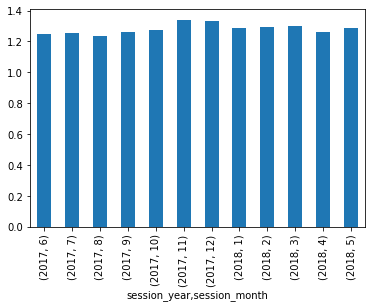

In [42]:
sessions_per_user['sessions_per_user'].plot(kind='bar')

it can be seen from the two methods that several daily sessions have differences in the number of users that vary from one day to another. it means, on average, it turns out that each user spends at most 1 session per month using the Y.Afisha site, which means, it can be said that this site is not used regularly.

In [43]:
#duration per session
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits

,device,end_ts,source_id,start_ts,user_id,session_year,session_month,session_week,session_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19


In [44]:
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

<AxesSubplot:>

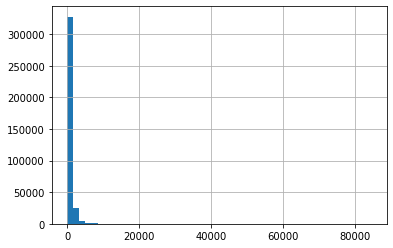

In [45]:
visits['session_duration'].hist(bins=50)

The graph shows that because the distribution of duration for each customer is different or the distribution is not normal, so to see the distribution of duration for each customer we use the mode or value that appears frequently in the duration column.

In [46]:
visits['session_duration'].mode()

0    60
dtype: int64

The result shows that session lengths are not evenly distributed. 60 seconds or a minute is enough to complete an order.

In [47]:
#how often do users return to using the product?
sticky_wau = dau_total / wau_total * 100
sticky_wau

user_id    15.587069
dtype: float64

the percentage of users returning to the Y.Afisha site per week is 15.8%, which means that it is unlikely that all visitors will return to the Y.Afisha site

In [48]:
sticky_mau = dau_total / mau_total * 100
sticky_mau

user_id    3.90897
dtype: float64

The percentage of users returning to using the Y.Afisha site per month is 3.9%, this is the same as the percentage on sticky_wau. This needs to be further analyzed what causes the Y.Afisha site not to be visited frequently

## Sales

In [49]:
#When did people start making purchases?
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,user_id,session_year,session_month,session_week,session_date,session_duration,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-01


In [50]:
first_visits = visits.groupby('user_id').agg({'visit_month': 'min'}).reset_index()
first_visits.columns = ['user_id', 'first_visit_month']
first_visits.head()

,user_id,first_visit_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [51]:
first_visits_ts = visits.groupby('user_id').agg({'start_ts': 'min'}).reset_index()
first_visits_source = first_visits_ts.merge(
    visits,
    on=['user_id', 'start_ts'], 
    how='inner'
)
first_visits_source = first_visits_source[['user_id','source_id']]
first_visits_source

,user_id,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228165,18446403737806311543,5
228166,18446424184725333426,4
228167,18446556406699109058,3
228168,18446621818809592527,4


In [52]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('user_id').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_month']
first_orders.head()

,user_id,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [53]:
first_order_visit = pd.merge(first_orders, first_visits, on='user_id')
first_order_visit

,user_id,first_order_month,first_visit_month
0,313578113262317,2018-01-01,2017-09-01
1,1575281904278712,2017-06-01,2017-06-01
2,2429014661409475,2017-10-01,2017-10-01
3,2464366381792757,2018-01-01,2018-01-01
4,2551852515556206,2017-11-01,2017-11-01
...,...,...,...
36518,18445147675727495770,2017-11-01,2017-08-01
36519,18445407535914413204,2017-09-01,2017-09-01
36520,18445601152732270159,2018-03-01,2017-08-01
36521,18446156210226471712,2018-02-01,2017-11-01


In [54]:
first_order_visit['time_to_purchase'] = first_order_visit['first_order_month'] - first_order_visit['first_visit_month']
first_order_visit.head()

,user_id,first_order_month,first_visit_month,time_to_purchase
0,313578113262317,2018-01-01,2017-09-01,122 days
1,1575281904278712,2017-06-01,2017-06-01,0 days
2,2429014661409475,2017-10-01,2017-10-01,0 days
3,2464366381792757,2018-01-01,2018-01-01,0 days
4,2551852515556206,2017-11-01,2017-11-01,0 days


In [55]:
first_order_visit['time_to_purchase'].describe()

count                         36523
mean     16 days 14:30:28.436875393
std      46 days 19:49:39.839421333
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 0 days 00:00:00
max               334 days 00:00:00
Name: time_to_purchase, dtype: object

In [56]:
# check how many visitors made purchases in day 0 days or the first day of visiting the Y.Afis site
first_order_visit[first_order_visit['time_to_purchase'] == '0'].head()

,user_id,first_order_month,first_visit_month,time_to_purchase
1,1575281904278712,2017-06-01,2017-06-01,0 days
2,2429014661409475,2017-10-01,2017-10-01,0 days
3,2464366381792757,2018-01-01,2018-01-01,0 days
4,2551852515556206,2017-11-01,2017-11-01,0 days
5,3077748354309989,2018-03-01,2018-03-01,0 days


In [57]:
first_order_visit[first_order_visit['time_to_purchase'] == '0'].shape

(30087, 4)

In [58]:
first_order_visit['time_to_purchase'] = pd.to_numeric(first_order_visit['time_to_purchase']).astype(int)


<AxesSubplot:>

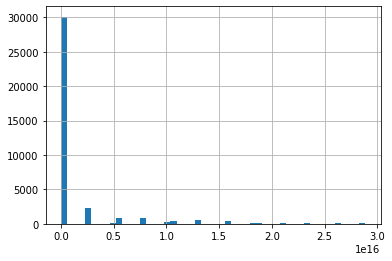

In [59]:
first_order_visit['time_to_purchase'].hist(bins=50)

the data shows there were 36524 first visits of visitors to the Y.Afisha site on average and 30087 of all visitors made purchases on the first day of entry to the site. because seen from the time of visit and the time of purchase the difference is 0 days, which means the visitor made a purchase on the first day of visiting the Y.Afisha site.

In [60]:
orders['order_date'] = orders['buy_ts'].astype('datetime64[D]')
orders.head()

,buy_ts,revenue,user_id,order_month,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [61]:
#the number of orders they make during a given daily period
total_order_per_day = orders.groupby('order_date')['user_id'].count().reset_index()
total_order_per_day.head()

,order_date,user_id
0,2017-06-01,96
1,2017-06-02,111
2,2017-06-03,67
3,2017-06-04,66
4,2017-06-05,161


In [62]:
total_order_per_day.describe()

,user_id
count,364.000000
mean,138.502747
std,76.858480
min,1.000000
25%,82.750000
50%,136.000000
75%,177.000000
max,814.000000


In [63]:
total_order_per_day[total_order_per_day['user_id'] == 814]

,order_date,user_id
176,2017-11-24,814


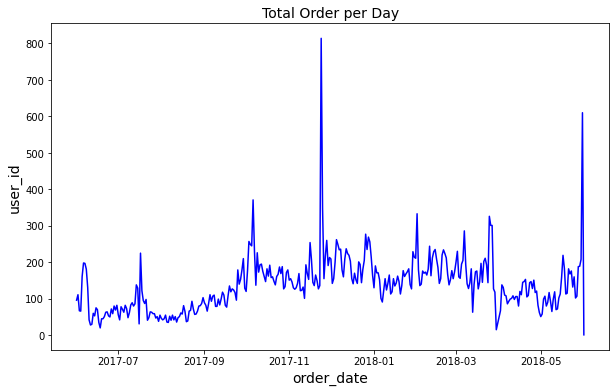

In [97]:
df = pd.DataFrame(total_order_per_day)
  
plt.figure(figsize=(10,6))
plt.plot(df['order_date'], df['user_id'], color='blue')
plt.title('Total Order per Day', fontsize=14)
plt.xlabel('order_date', fontsize=14)
plt.ylabel('user_id', fontsize=14)
plt.show()

it can be seen from The average number of orders made per day from 2017-06-01 to 2018-06-01 was 138 orders and the maximum order per day was on 2017-11-24 as many as 814 orders.

In [66]:
#the number of orders they make during a given monthly period
total_order_per_month = orders.groupby('order_month')['user_id'].count()
total_order_per_month


order_month
2017-06-01    2354
2017-07-01    2363
2017-08-01    1807
2017-09-01    3387
2017-10-01    5679
2017-11-01    5659
2017-12-01    6218
2018-01-01    4721
2018-02-01    5281
2018-03-01    5326
2018-04-01    3273
2018-05-01    4346
2018-06-01       1
Name: user_id, dtype: int64

The result shows the highest number of orders was in December 2017 with 6218.

In [67]:
#average purchase size.
total_order_per_day.mean()

/tmp/ipykernel_173/4076558955.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  total_order_per_day.mean()


user_id    138.502747
dtype: float64

The number of purchases per day for the last 1 year is 138 purchases.

In [68]:
new = pd.merge(first_order_visit, orders, on='user_id')
new

,user_id,first_order_month,first_visit_month,time_to_purchase,buy_ts,revenue,order_month,order_date
0,313578113262317,2018-01-01,2017-09-01,10540800000000000,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-03
1,1575281904278712,2017-06-01,2017-06-01,0,2017-06-03 10:13:00,1.22,2017-06-01,2017-06-03
2,1575281904278712,2017-06-01,2017-06-01,0,2017-06-03 17:39:00,1.83,2017-06-01,2017-06-03
3,2429014661409475,2017-10-01,2017-10-01,0,2017-10-11 18:33:00,73.33,2017-10-01,2017-10-11
4,2464366381792757,2018-01-01,2018-01-01,0,2018-01-28 15:54:00,2.44,2018-01-01,2018-01-28
...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-01,2017-09-01,0,2017-09-24 23:48:00,0.24,2017-09-01,2017-09-24
50411,18445407535914413204,2017-09-01,2017-09-01,0,2017-09-25 15:56:00,0.12,2017-09-01,2017-09-25
50412,18445601152732270159,2018-03-01,2017-08-01,18316800000000000,2018-03-26 22:54:00,4.22,2018-03-01,2018-03-26
50413,18446156210226471712,2018-02-01,2017-11-01,7948800000000000,2018-02-18 19:34:00,9.78,2018-02-01,2018-02-18


In [69]:
# amount of money contributed (ltv) per month
total_monthly_revenue = new.groupby('order_month')['revenue'].sum().reset_index()
total_monthly_revenue.columns = ['order_month', 'revenue']
total_monthly_revenue

,order_month,revenue
0,2017-06-01,9557.49
1,2017-07-01,12539.47
2,2017-08-01,8758.78
3,2017-09-01,18345.51
4,2017-10-01,27987.70
5,2017-11-01,27069.93
6,2017-12-01,36388.60
7,2018-01-01,19417.13
8,2018-02-01,25560.54
9,2018-03-01,28834.59


In [70]:
cohort_size = (
    first_orders.groupby('first_order_month')
    .agg({'user_id': 'nunique'})
    .reset_index())
cohort_size.columns = ['first_order_month', 'n_buyers']
cohort_size

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


<AxesSubplot:xlabel='first_order_month', ylabel='n_buyers'>

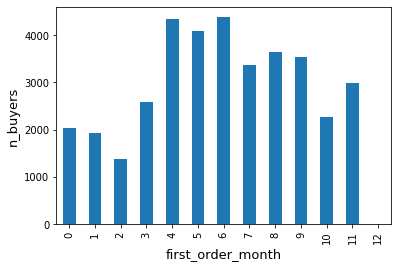

In [71]:
plt.figure(figsize=(6,4))
plt.ylabel('n_buyers', size=13)
plt.xlabel('first_order_month', size=13)
cohort_size['n_buyers'].plot(kind='bar')

The result shows that revenue tertinggi ada pada bulan ke-6 yaitu desember tahun 2017.

In [72]:
orders_ = pd.merge(orders, first_orders, on='user_id')
cohorts = (
    orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())

In [73]:
report = pd.merge(cohort_size, cohorts, on='first_order_month')

report['gp'] = report['revenue']
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

result = result.fillna('')
result


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09-01,5.644529,1.117586,0.52093,3.975792,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.084816,0.11547,,,,
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.31293,0.338047,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,,,,,,,
2018-02-01,4.156987,0.278274,0.078515,0.074144,,,,,,,,


In [74]:
#the amount of money they contribute (LTV)
ltv = total_monthly_revenue['revenue']/cohort_size['n_buyers']
ltv

0     4.724414
1     6.520785
2     6.393270
3     7.107908
4     6.448779
5     6.633161
6     8.302213
7     5.756635
8     7.000970
9     8.161503
10    7.406880
11    6.939752
12    3.420000
dtype: float64

The highest average value of ltv per month is in the 6th month, namely December 2017, the value of customer loyalty is at the end of the year when viewed from the size of the ltv in the 6th month, then the ltv value is unstable in the following months, maybe we should One way to improve its marketing strategy is to improve service and retain customers who have high loyalty to the company.

## Marketing

In [75]:
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [76]:
costs['costs_month']=costs['date'].astype('datetime64[M]')
costs

,source_id,date,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [77]:
#amount of money spent: whole_expenses
whole_expenses = costs['costs'].sum()
whole_expenses


329131.62

In [78]:
# check the ad source ID
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [79]:
#amount of money spent: per_source_expenses
per_source_expenses = costs.groupby('source_id')['costs'].sum()
per_source_expenses

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

<AxesSubplot:xlabel='source_id'>

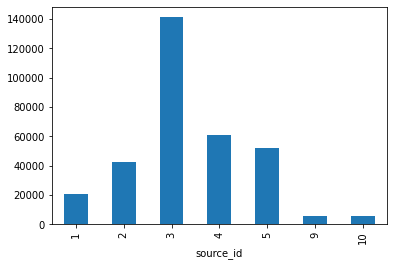

In [80]:
plt.figure(figsize=(6,4))
per_source_expenses.plot(kind='bar')

In [81]:
#amount of money spent: time_to_time_expenses
costs_per_month = costs.groupby(['costs_month','source_id'])['costs'].sum().reset_index()
costs_per_month

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


Advertising sources with ID 3 incur the highest marketing costs than the others, and the highest spending costs are in December 2017.

The highest amount of expenditure is in November and December. The highest income was also in December, we can see that the thing that made high income at the end of that year was because the marketing team did a lot of marketing so that the costs incurred were high and the income was also high.

In [82]:
orders_source = orders_.merge(first_visits_source, on='user_id')
orders_source

,buy_ts,revenue,user_id,order_month,order_date,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-05-01,3


In [83]:
cohorts = (
    orders_source.groupby(['first_order_month', 'order_month', 'source_id'])
    .agg({'revenue': 'sum'})
    .reset_index())
orders_source

,buy_ts,revenue,user_id,order_month,order_date,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-05-01,3


In [84]:
report = pd.merge(cohort_size, cohorts, on='first_order_month')
report

,first_order_month,n_buyers,order_month,source_id,revenue
0,2017-06-01,2023,2017-06-01,1,1378.70
1,2017-06-01,2023,2017-06-01,2,1043.68
2,2017-06-01,2023,2017-06-01,3,2804.34
3,2017-06-01,2023,2017-06-01,4,1959.84
4,2017-06-01,2023,2017-06-01,5,1898.89
...,...,...,...,...,...
511,2018-05-01,2988,2018-05-01,4,3802.91
512,2018-05-01,2988,2018-05-01,5,2094.04
513,2018-05-01,2988,2018-05-01,9,223.05
514,2018-05-01,2988,2018-05-01,10,470.89


In [85]:
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [86]:
report['ltv'] = report['revenue'] / report['n_buyers']
report

,first_order_month,n_buyers,order_month,source_id,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,1,1378.70,0,0.681513
1,2017-06-01,2023,2017-06-01,2,1043.68,0,0.515907
2,2017-06-01,2023,2017-06-01,3,2804.34,0,1.386228
3,2017-06-01,2023,2017-06-01,4,1959.84,0,0.968779
4,2017-06-01,2023,2017-06-01,5,1898.89,0,0.938651
...,...,...,...,...,...,...,...
511,2018-05-01,2988,2018-05-01,4,3802.91,0,1.272728
512,2018-05-01,2988,2018-05-01,5,2094.04,0,0.700817
513,2018-05-01,2988,2018-05-01,9,223.05,0,0.074649
514,2018-05-01,2988,2018-05-01,10,470.89,0,0.157594


In [87]:
report_ = pd.merge(report, costs_per_month, left_on=['first_order_month', 'source_id'], right_on=['costs_month', 'source_id'])
report_

,first_order_month,n_buyers,order_month,source_id,revenue,age,ltv,costs_month,costs
0,2017-06-01,2023,2017-06-01,1,1378.70,0,0.681513,2017-06-01,1125.61
1,2017-06-01,2023,2017-07-01,1,414.98,1,0.205131,2017-06-01,1125.61
2,2017-06-01,2023,2017-08-01,1,419.43,2,0.207331,2017-06-01,1125.61
3,2017-06-01,2023,2017-09-01,1,714.24,3,0.353060,2017-06-01,1125.61
4,2017-06-01,2023,2017-10-01,1,811.20,4,0.400989,2017-06-01,1125.61
...,...,...,...,...,...,...,...,...,...
509,2018-05-01,2988,2018-05-01,3,3256.54,0,1.089873,2018-05-01,9411.42
510,2018-05-01,2988,2018-05-01,4,3802.91,0,1.272728,2018-05-01,4214.21
511,2018-05-01,2988,2018-05-01,5,2094.04,0,0.700817,2018-05-01,3669.56
512,2018-05-01,2988,2018-05-01,9,223.05,0,0.074649,2018-05-01,362.17


In [88]:
report_['cac'] = report_['costs'] / report_['n_buyers']
report_

,first_order_month,n_buyers,order_month,source_id,revenue,age,ltv,costs_month,costs,cac
0,2017-06-01,2023,2017-06-01,1,1378.70,0,0.681513,2017-06-01,1125.61,0.556406
1,2017-06-01,2023,2017-07-01,1,414.98,1,0.205131,2017-06-01,1125.61,0.556406
2,2017-06-01,2023,2017-08-01,1,419.43,2,0.207331,2017-06-01,1125.61,0.556406
3,2017-06-01,2023,2017-09-01,1,714.24,3,0.353060,2017-06-01,1125.61,0.556406
4,2017-06-01,2023,2017-10-01,1,811.20,4,0.400989,2017-06-01,1125.61,0.556406
...,...,...,...,...,...,...,...,...,...,...
509,2018-05-01,2988,2018-05-01,3,3256.54,0,1.089873,2018-05-01,9411.42,3.149739
510,2018-05-01,2988,2018-05-01,4,3802.91,0,1.272728,2018-05-01,4214.21,1.410378
511,2018-05-01,2988,2018-05-01,5,2094.04,0,0.700817,2018-05-01,3669.56,1.228099
512,2018-05-01,2988,2018-05-01,9,223.05,0,0.074649,2018-05-01,362.17,0.121208


In [89]:
report_['romi'] = report_['ltv'] / report_['cac']
report_

,first_order_month,n_buyers,order_month,source_id,revenue,age,ltv,costs_month,costs,cac,romi
0,2017-06-01,2023,2017-06-01,1,1378.70,0,0.681513,2017-06-01,1125.61,0.556406,1.224847
1,2017-06-01,2023,2017-07-01,1,414.98,1,0.205131,2017-06-01,1125.61,0.556406,0.368671
2,2017-06-01,2023,2017-08-01,1,419.43,2,0.207331,2017-06-01,1125.61,0.556406,0.372625
3,2017-06-01,2023,2017-09-01,1,714.24,3,0.353060,2017-06-01,1125.61,0.556406,0.634536
4,2017-06-01,2023,2017-10-01,1,811.20,4,0.400989,2017-06-01,1125.61,0.556406,0.720676
...,...,...,...,...,...,...,...,...,...,...,...
509,2018-05-01,2988,2018-05-01,3,3256.54,0,1.089873,2018-05-01,9411.42,3.149739,0.346020
510,2018-05-01,2988,2018-05-01,4,3802.91,0,1.272728,2018-05-01,4214.21,1.410378,0.902402
511,2018-05-01,2988,2018-05-01,5,2094.04,0,0.700817,2018-05-01,3669.56,1.228099,0.570652
512,2018-05-01,2988,2018-05-01,9,223.05,0,0.074649,2018-05-01,362.17,0.121208,0.615871


In [90]:
output = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')
output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.70,0.79,0.89,1.09,1.29,1.42,1.59,1.71,1.81,1.92,2.01,2.08
2017-07-01,0.73,0.78,0.94,1.01,1.05,1.08,1.11,1.13,1.17,1.2,1.23,
2017-08-01,0.67,0.73,0.81,0.86,0.93,0.96,1.0,1.07,1.12,1.15,,
2017-09-01,0.68,0.85,0.93,1.34,1.4,1.48,1.57,1.62,1.67,,,
2017-10-01,0.77,0.86,0.89,0.92,0.94,0.97,0.98,1.0,,,,
2017-11-01,0.71,0.76,0.8,0.85,0.87,0.88,0.9,,,,,
2017-12-01,0.61,0.65,0.79,0.96,1.0,1.04,,,,,,
2018-01-01,0.47,0.5,0.53,0.56,0.57,,,,,,,
2018-02-01,0.57,0.61,0.62,0.63,,,,,,,,


In [91]:
#average ROMI value
output.cumsum(axis=1).mean(axis=0)

age
0     0.671704
1     0.726964
2     0.811090
3     0.912492
4     1.004968
5     1.118465
6     1.189978
7     1.304386
8     1.442415
9     1.422659
10    1.618827
11    2.076226
dtype: float64

if you look at the value of ROMI (return on marketing investment) every month it can already provide benefits and can be said to be profitable for the investment. the average ROMI (return on marketing investment) continues to increase each month. This is a positive thing for the company.

<AxesSubplot:xlabel='age'>

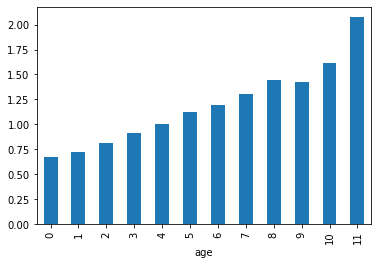

In [92]:
plt.figure(figsize=(6,4))
output.cumsum(axis=1).mean(axis=0).plot(kind='bar')

In [93]:
#customer acquisition costs (CAC) from each source
report_source = report_.groupby('source_id').agg({'cac': 'mean'})
report_source

,cac
source_id,
1,0.584459
2,1.204565
3,3.970902
4,1.788124
5,1.451675
9,0.156120
10,0.164664


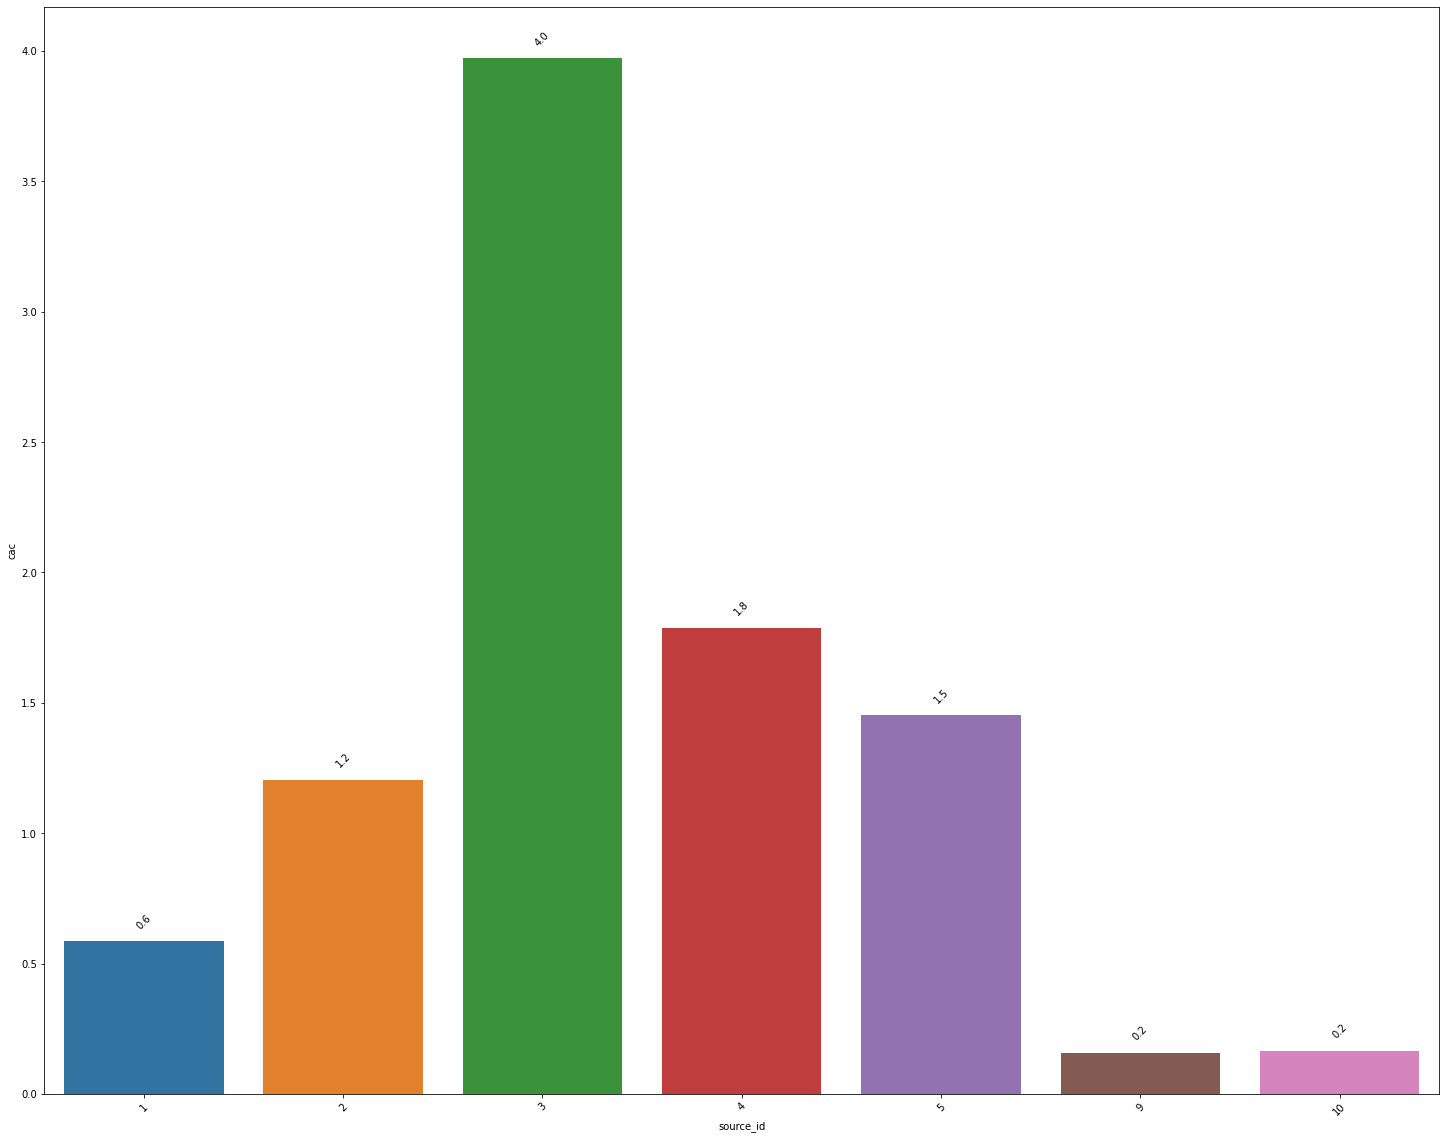

In [94]:
plt.figure(figsize=(25,20))
cost_per_user = report_source.groupby('source_id')['cac'].agg('sum').reset_index().sort_values(by = 'source_id')
splot = sns.barplot(data=cost_per_user, x='source_id', y='cac')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

In [95]:
report_source = report_.groupby('source_id').agg({'romi': 'mean'})
report_source

,romi
source_id,
1,0.266649
2,0.165298
3,0.060600
4,0.144289
5,0.172421
9,0.172087
10,0.192320


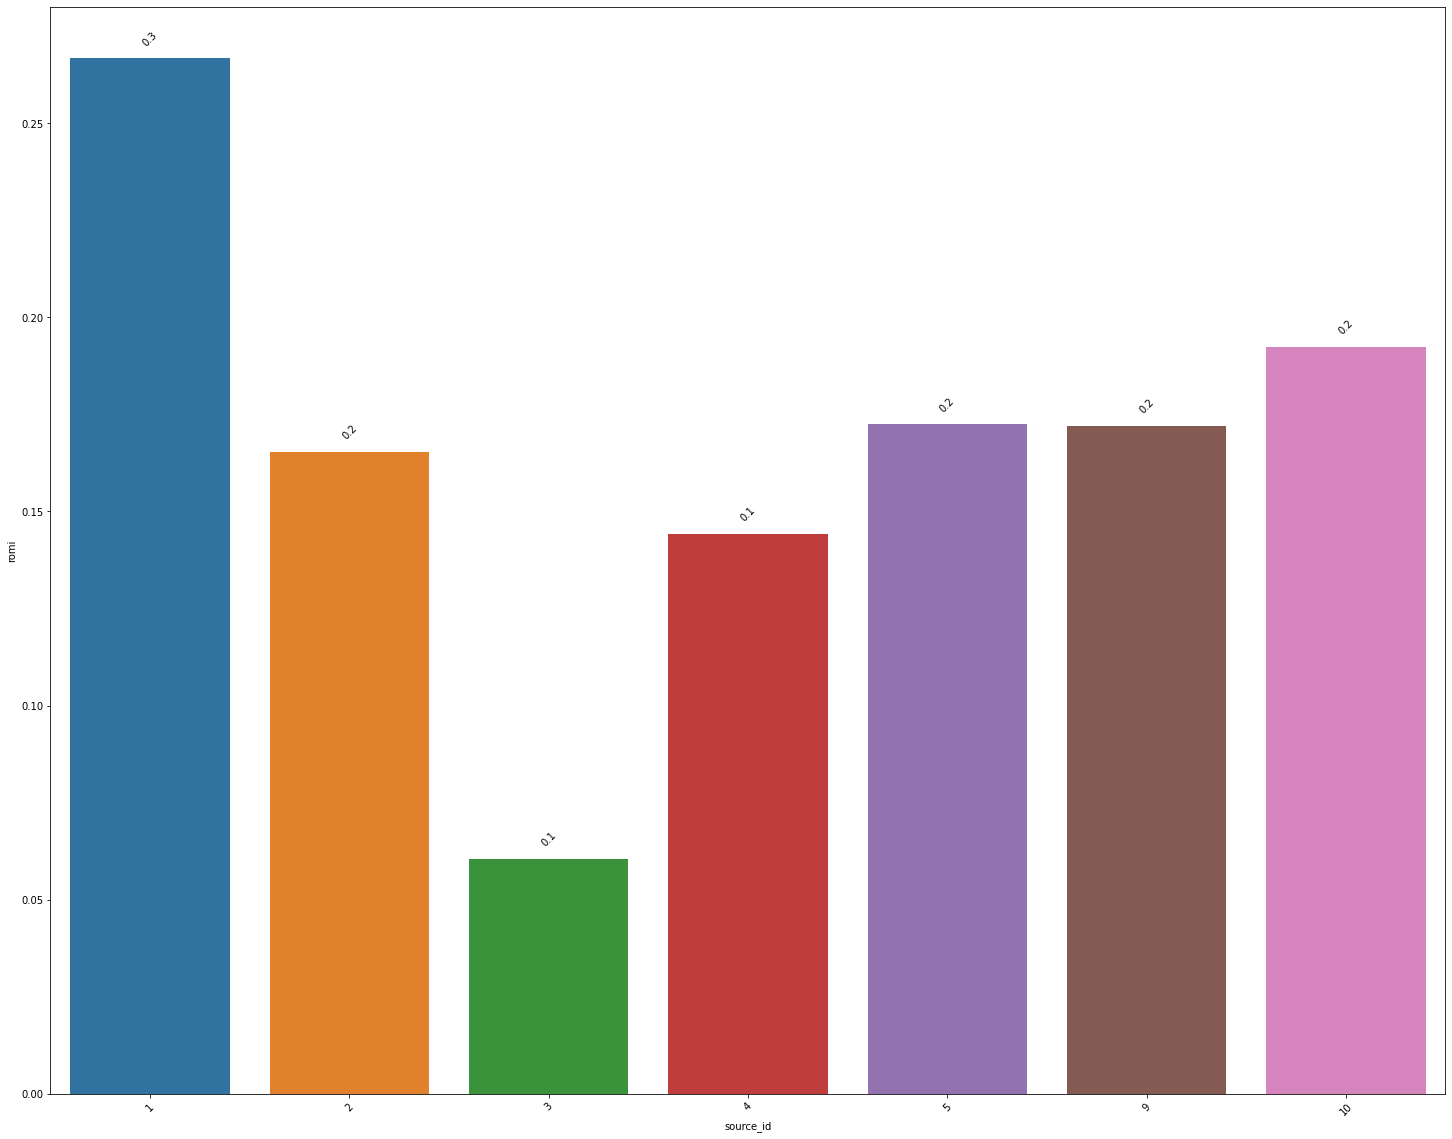

In [96]:
plt.figure(figsize=(25,20))
romi_source = report_source.groupby('source_id')['romi'].agg('sum').reset_index().sort_values(by = 'source_id')
splot = sns.barplot(data=romi_source, x='source_id', y='romi')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

From two graphics (cac and romi) above, it can be seen thatn ads with source id 3 have the highest average value compared to the others in cac graph, which means that source id 3 failed to attract users and it also showed in romi graph source id 3 has the lowest value. Hence, which is profitable here and managed to attract more users indicated by source id 1.

# Writing a conclusion

From the results of data processing from the Y.Afisha site, it is the advertising platform that is more profitable in sales when viewed from the average cac, namely advertising sources with ID 3, therefore advertising sources with ID 3 are better recommended to the marketing team because they are proven to attract more customers to use the Y.Afisha site. Here I focus more on the percentage of user return, ltv value, and ROMI value (return on marketing investment or return on marketing investment).

the percentage of users returning to using the Y.Afisha site per month is 3.9%. This value needs to be conveyed to the marketing team and the team in the product section to be able to improve quality and service for customers so that customer loyalty can increase Y.Afisha sites can be visited frequently.

in the 6th month, namely December 2017, revenue has increased quite high, maybe the marketing team would be more effective if the advertisement is done at the end of the year so that it can provide quite high profits from a business perspective. and then the value of ltv is not stable in the following months, maybe the marketing team should improve its marketing strategy in other months such as improving service and retaining customers who have high loyalty to the company, so that it is not only at the end of my year that the increase has increased.

if you look at the value of ROMI (return on marketing investment) every month it can already provide benefits and can be said to be profitable for the investment. the average ROMI every month continues to increase. This is a positive thing for the company.

So it can be concluded that the company has benefited from a marketing perspective, maybe what is more enhanced is customer loyalty to return to using the Y.Afisha site, and needs to look for marketing strategies that can increase customers such as improving product quality, improving service and retaining customers who provide high loyalty to the company.